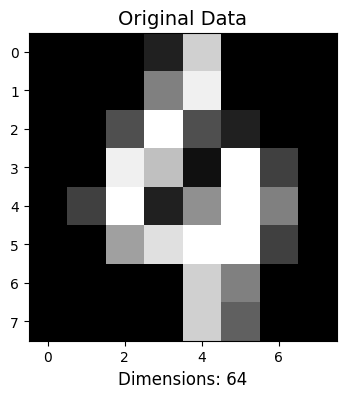

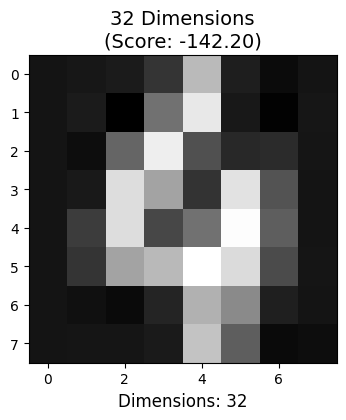

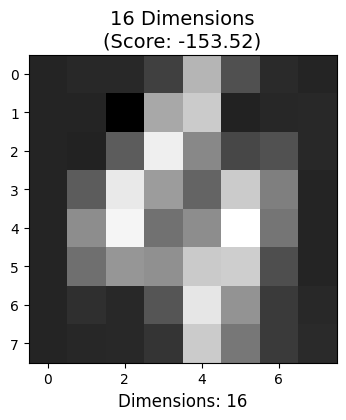

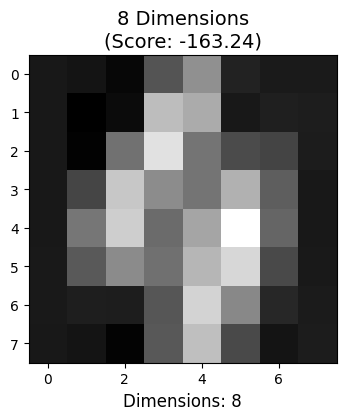

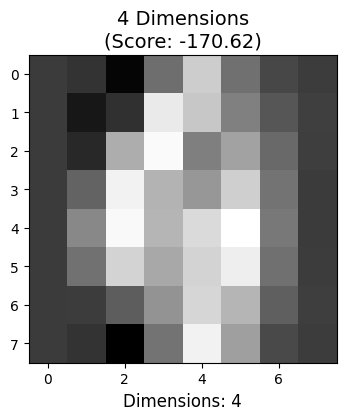

In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

"""
    1. digits 데이터를 불러오는
       load_data() 함수를 구현합니다.
"""
def load_data():
    X, y = load_digits(return_X_y=True)
    return X, y

"""
    2. PCA 알고리즘을 활용하여 차원을 축소하고,
       다시 이미지로 복원한 결과를 확인하기 위한
       train_PCA_and_restore_image() 함수를 구현합니다.
"""
def train_PCA_and_restore_image(dim_reduction_number, images): 
    # PCA 모델 생성
    pca = PCA(n_components=dim_reduction_number)
    # 차원 축소
    X_pca = pca.fit_transform(images)
    # 데이터 복원
    approx_original = pca.inverse_transform(X_pca)
    # score 계산
    score = pca.score(images)
    return approx_original, score

"""
digit 이미지를 시각화합니다.
"""
def visualize(X, x_label, title, score=None):
    plt.figure(figsize=(5, 4))
    n_data = 100  # 특정 데이터 포인트 시각화
    plt.imshow(X[n_data].reshape(8, 8),
               cmap=plt.cm.gray, interpolation='nearest')
    plt.xlabel(f"Dimensions: {x_label}", fontsize=12)
    title_with_score = title if score is None else f"{title}\n(Score: {score:.2f})"
    plt.title(title_with_score, fontsize=14)
    plt.show()

"""
    3. 구현한 함수를 활용하여 차원 축소를 진행하고
       시각화해주는 main() 함수를 완성합니다.
"""
def main():
    X, y = load_data()
    
    # 차원 축소와 이미지 복원 진행하기
    reduced_image_32, score_32 = train_PCA_and_restore_image(32, X)
    reduced_image_16, score_16 = train_PCA_and_restore_image(16, X)
    reduced_image_8, score_8 = train_PCA_and_restore_image(8, X)
    reduced_image_4, score_4 = train_PCA_and_restore_image(4, X)
    
    # 시각화 함수 호출하기
    visualize(X, '64', 'Original Data')
    visualize(reduced_image_32, '32', '32 Dimensions', score_32)
    visualize(reduced_image_16, '16', '16 Dimensions', score_16)
    visualize(reduced_image_8, '8', '8 Dimensions', score_8)
    visualize(reduced_image_4, '4', '4 Dimensions', score_4)

if __name__ == '__main__':
    main()